In [1]:
# 导入模块
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn.datasets as ds

import matplotlib.colors
# 导入Kmeans聚类算法
from sklearn.cluster import KMeans

In [3]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [21]:
# 使用sklearn.datasets模块模拟一些用户聚类的假数据
N = 1500 # 模拟样本数量
centers = 4 # 模拟样本划分为几个类别

# 使用make_blobs 创建簇状的数据集

# 返回值：
# data 所有样本特征，shape为：1500x2,  
# y 所有样本的类别，总共四个类别，分别为：[0,1,2,3]  shape为 (1500,) 一维的数组

data,y = ds.make_blobs(N, # 样本数量为：1500
                       n_features=2, # 特征数量为：2
                       centers=centers, # 所有样本分为4个类
                       random_state=10) # 用于创建随机样本一个随机数

In [22]:
# 查看前10个样本的类别
y[:10]

array([1, 2, 2, 1, 3, 3, 2, 0, 2, 0])

In [23]:
# 查看前10个样本特征10x2
data[:10]

array([[  4.25151798,   6.17225772],
       [  1.03745836,  -5.26870562],
       [ -0.66285466,  -5.28697222],
       [  2.32961945,   4.43571332],
       [ -5.26421578,   4.5857146 ],
       [ -4.97380222,   4.01970614],
       [  0.61686209,  -4.19431603],
       [  4.48697951, -10.07429823],
       [ -0.18870867,  -7.03383848],
       [  4.10104699,  -9.56641288]])

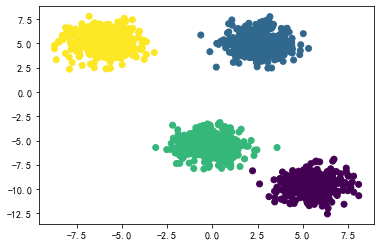

In [24]:
# 使用所有样本第一个特征作为x轴
# 使用所有样本第二个特征作为y轴
# 绘制散点图
plt.scatter(data[:,0], # 第一个特征作为x轴
            data[:,1], # 第二特征作为y轴
            c=y) # 每个样本类别作为点的颜色标签

In [28]:
# 实例化Kmeans聚类模型
# n_clusters 核心参数，是随机选取的聚类中心点数量
km = KMeans(n_clusters=centers,  # 将所有的样本聚为4个类
            random_state=28)     # 随机数，用于随机选取中心点
# 对所有的样本进行聚类操作
km.fit(data,y)  # 此处给KMeans算法输入目标变量y仅仅是为了让API看起来更统一，即使不输入y也不会影响模型训练

# 思考：此处有何异常之处？
# 解释：聚类算法的训练样本是不需要有目标变量

KMeans(n_clusters=4, random_state=28)

In [11]:
print ("所有样本距离聚簇中心点的总距离和:", km.inertia_)
print ("距离聚簇中心点的平均距离:", (km.inertia_ / N))
cluster_centers = km.cluster_centers_
print ("聚簇中心点：\n", cluster_centers)

所有样本距离聚簇中心点的总距离和: 2877.130452655617
距离聚簇中心点的平均距离: 1.9180869684370778
聚簇中心点：
 [[ 2.60786057  5.00654462]
 [ 5.49479518 -9.59701372]
 [-6.04063565  5.17896311]
 [-0.09723311 -5.55596773]]


In [13]:
# 使用聚类模型对所有样本进行类别划分
# 此处预处就是按照每个样本到四个聚类中心点的距离，划分类别，然后再给这些类别打一个标签
y_hat = km.predict(data) 

In [14]:
# 样本真实类别
y[:10]

array([1, 2, 2, 1, 3, 3, 2, 0, 2, 0])

In [16]:
# 预测类别
y_hat[:10]

array([0, 3, 3, 0, 2, 2, 3, 1, 3, 1])

In [ ]:
# 思考：聚类模型对样本预测类别与真实类别是否有关系？
# 答：没有关系，样本真实类别为1，聚类模型预测有可能是0，1，2，3，。。。

In [29]:
# 扩展区间的边界值，用于辅助绘图
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [18]:
# 给定一个区间范围：[-100,150]  a = -100,b = 150
expandBorder(-100,150)

(-125.0, 175.0)

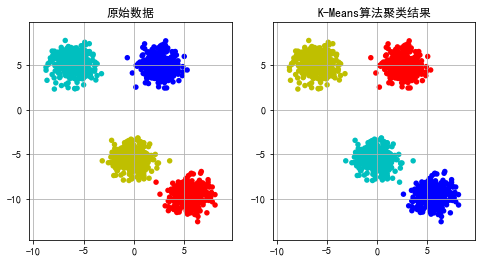

In [44]:
cm = mpl.colors.ListedColormap(list('rgbmyc'))

# 绘制原始数据分布散点图
plt.figure(figsize=(8,4), facecolor='w')  # facecolor 画布背景色
plt.subplot(121)
plt.scatter(data[:, 0], # 第一个特征作为x轴
            data[:, 1], # 第二特征作为y轴
            c=y,  # 样本类别作为样本点的颜色
            s=30, # 点的大小
            cmap=cm, # 给定一个颜色的容器
            edgecolors='none')
plt.grid(True)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'原始数据')

# 聚类模型预测样本类别分布

# 计算样本的第一个特征和第二个特征的最小值
x1_min, x2_min = np.min(data, axis=0)
# 计算样本的第一个特征和第二个特征的最大值
x1_max, x2_max = np.max(data, axis=0)
# 以上操作是为了确定绘图时坐标轴的数值范围

# 将坐标轴的范围进行放大
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)

plt.subplot(122)
plt.scatter(data[:, 0],
            data[:, 1], 
            c=y_hat, # 使用预测类别作为样本颜色
            s=30, 
            cmap=cm, 
            edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'K-Means算法聚类结果')
plt.grid(True)
plt.show()

In [37]:
data[:3]

array([[ 4.25151798,  6.17225772],
       [ 1.03745836, -5.26870562],
       [-0.66285466, -5.28697222]])

In [38]:
# 计算每一列的最小值
np.min(data[:3],axis=0)

array([-0.66285466, -5.28697222])

In [39]:
# 计算每一行的最小值
np.min(data[:3],axis=1)

array([ 4.25151798, -5.26870562, -5.28697222])

In [21]:
# 创建一个颜色容器
cm = mpl.colors.ListedColormap(list('rgbmyc'))

In [31]:
cm.colors

['r', 'g', 'b', 'm', 'y', 'c']

In [32]:
y[:10]

array([1, 2, 2, 1, 3, 3, 2, 0, 2, 0])

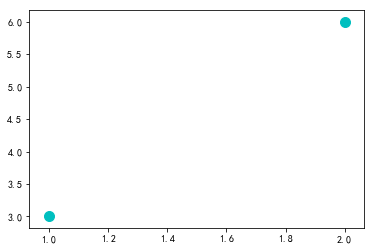

In [30]:
plt.scatter([1,2],
            [3,6],
            s=100,
            c="c")